In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
#Pour avoir l'auto complétion:
%config IPCompleter.greedy=True  

In [31]:
#On importe les données
data=pd.read_csv('preprocessed_CAC40.csv',index_col='Date',parse_dates=True)

In [32]:

data=data[data['Name'] == 'SAFRAN']
data.tail()

,Unnamed: 0,Name,Open,Closing_Price,Daily_High,Daily_Low,Volume
Date,,,,,,,
2010-01-08,67593,SAFRAN,14.19,14.19,14.19,14.19,550
2010-01-07,67594,SAFRAN,14.04,14.68,14.78,14.04,275
2010-01-06,67595,SAFRAN,14.34,14.34,14.34,14.34,"1,29"
2010-01-05,67596,SAFRAN,13.79,14.57,14.57,13.79,345
2010-01-04,67597,SAFRAN,13.54,14.00,14.00,13.54,150


In [33]:
#On applique l'algorithme de la tortue
def tortue(dataset, annee):
    data=dataset.copy()
    data['Buy'] = np.zeros(len(data))#On ajoute les colonnes Buy et Sell à notre dataset
    data['Sell'] = np.zeros(len(data))
    data['RollingMax'] = data['Daily_High'].shift(-31).rolling(window=30).max()
    data['RollingMin'] = data['Daily_High'].shift(-31).rolling(window=30).min()
    data.loc[data['RollingMax'] < data['Daily_High'], 'Buy'] = 1
    data.loc[data['RollingMin'] > data['Daily_High'], 'Sell'] = -1
    start=annee
    end=annee
    fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
    ax[0].plot(data['Daily_High'][start:end])
    ax[0].plot(data['RollingMin'][start:end])
    ax[0].plot(data['RollingMax'][start:end])
    ax[0].legend(['daily_High', 'min', 'max'])
    ax[1].plot(data['Buy'][start:end], c='y')
    ax[1].plot(data['Sell'][start:end], c='r')
    ax[1].legend(['buy', 'sell'])

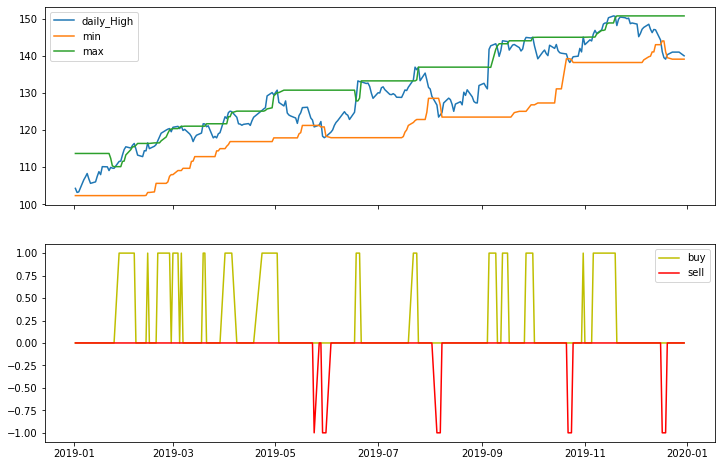

In [34]:
#L'année 2019 pour l'entreprise SAFRAN
tortue(data, '2019')